In [20]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [21]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

In [22]:
train_input.shape

(60000, 28, 28)

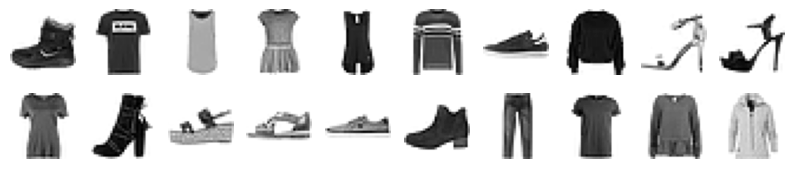

In [23]:
fig,axs = plt.subplots(2,10,figsize=(10,2))
for i in range(2):
    for j in range(10):
        axs[i,j].imshow(train_input[10*i+j],cmap='gray_r')
        axs[i,j].axis('off')

In [24]:
# 표준화작업
# train_scaled = train_input/255
# 1차원행렬로 변경
# train_scaled = train_scaled.reshape(-1,28*28)

# 합성곱 신경망은 3차원 행렬이 되어야 함.
train_scaled = train_input.reshape(-1,28,28,1)/255

In [25]:
train_scaled.shape

(60000, 28, 28, 1)

In [26]:
# train세트 - train세트,검증세트,test세트

train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

1차 합성곱 층을 생성

In [32]:
# 1차 합성곱 신경망
model = keras.Sequential()
# padding='same', 'valid':패딩사용하지 않음.
# input_shape = (28,28,1) , 사이즈28x28 그레이색상 1, (28,28,3) - 사이즈 28x28,RGB색상 3개
model.add( keras.layers.Conv2D( 32,kernel_size=(3,3),activation='relu',padding='same',
          input_shape=(28,28,1) ) )
model.add(keras.layers.MaxPooling2D(2))

2차 합성곱 층을 생성

In [33]:
# 2차 합성곱 신경망 생성
model.add( keras.layers.Conv2D( 64,kernel_size=(3,3),activation='relu',padding='same') )
model.add(keras.layers.MaxPooling2D(2))

In [35]:
model.add(keras.layers.Flatten()) # 1차원행렬
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))


In [36]:
model.summary()

# conv2d param사이즈 : kernel_size(3,3) x 깊이(1) x 필터(32개)+ 32개절편 - 3 x 3 x 1 x 32 + 32 = 320
# MaxPooling2D -> 사이즈가 절반으로 변경
# flatten : 1차원 행렬 14*14*32 = 6275

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 335,636 (1.28 MB)

 Trainable params: 335,636 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# keras.utils.plot_model(model)

In [30]:
# keras.utils.plot_model(model,show_shapes=True, to_file='cnn_a.png',dpi=300)

In [ ]:
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

In [37]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('cnn_model.keras')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cb,early_stopping_cb]
                    )


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4068 - loss: 1.4409 - val_accuracy: 0.6898 - val_loss: 0.6750
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7196 - loss: 0.6544 - val_accuracy: 0.8287 - val_loss: 0.4474
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8216 - loss: 0.4636 - val_accuracy: 0.8666 - val_loss: 0.3780
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8638 - loss: 0.3992 - val_accuracy: 0.8915 - val_loss: 0.3208
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8861 - loss: 0.3416 - val_accuracy: 0.8999 - val_loss: 0.2949
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8954 - loss: 0.3107 - val_accuracy: 0.9022 - val_loss: 0.2874
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9057 - loss: 0.2803 - val_accuracy: 0.9062 - val_loss: 0.2813
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9102 - loss: 0

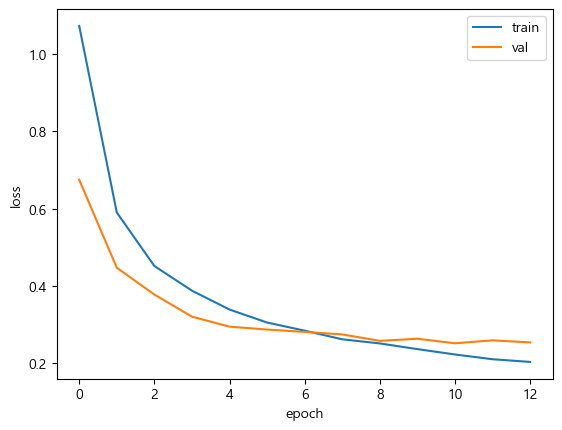

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [40]:
# stop위치 출력
early_stopping_cb.stopped_epoch

12

In [39]:
model.evaluate(val_scaled,val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9158 - loss: 0.2423


[0.25184115767478943, 0.9144166707992554]

In [45]:
# val_scaled[0].reshape(28,28)

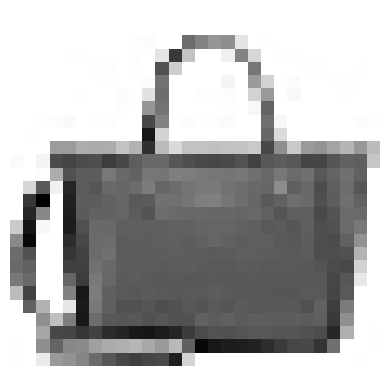

In [44]:
plt.imshow(val_scaled[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.show()

In [46]:
predict = model.predict(val_scaled[0:1]) # 3차원 행렬형태
print(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[2.2169886e-06 3.6210626e-08 1.0168333e-11 3.5403787e-09 1.8929221e-07
  3.0164965e-10 9.0459020e-05 3.3116748e-08 9.9986827e-01 3.8629831e-05]]


In [51]:
predict[0]

array([2.2169886e-06, 3.6210626e-08, 1.0168333e-11, 3.5403787e-09,
       1.8929221e-07, 3.0164965e-10, 9.0459020e-05, 3.3116748e-08,
       9.9986827e-01, 3.8629831e-05], dtype=float32)

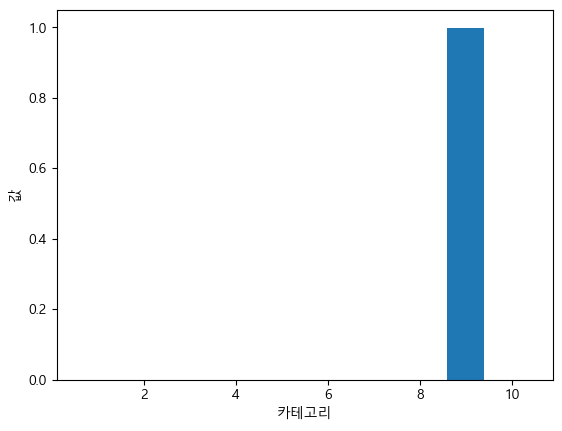

In [49]:
plt.bar(range(1,11),predict[0])
plt.xlabel('카테고리')
plt.ylabel('값')
plt.show()

In [52]:
classes = ['티셔츠','바지','스웨터','드레스','코트','샌달','셔츠','스니커즈','가방','앵글부츠']

In [53]:
print(classes[np.argmax(predict)])  # np.argmax 최대값의 index값을 리턴

가방


In [54]:
# test세트 검증
test_scaled = test_input.reshape(-1,28,28,1)/255.0

In [55]:
# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
model.evaluate(test_scaled,test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9007 - loss: 0.2931


[0.28667449951171875, 0.9021999835968018]

In [14]:
# 딥러닝 훈련
# 데이터전처리 train_scaled = train_input.reshape(-1,28,28,1)/255

# 모델결정 model = keras.Sequential()
# 합성곱 신경망 (CNN)
# 1차 합성곱 신경망 
# model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
#                                input_shape=(28,28,1))
# 최대풀링 model.add(keras.layers.MaxPooling2D(2))
# 2차 합성곱 신경망
# model.add( keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',padding='same') )
# model.add(keras.layers.MaxPooling2D(2))

# 인공신경망 훈련
# Flatten 추가  model.add(keras.layers.Flatten())
# Dense층 추가  model.add(keras.layers.Dense(100,activation='relu'))
# 드롭아웃추가  model.add(keras.layers.Dropout(0.4)) # 40%를 제외시키는 규제적용
# Dense층 추가  model.add(keras.layers.Dense(10,activation='softmax'))
# 모델설정 옵티마이저 - adam
# model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# 콜백모델체크포인트 checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras')
# 종기종료 early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True )
# 모델훈련 history = model.fit(train_scaled,train_target,batch_size=32,epochs=20,
#                      validation_data=(val_scaled,val_target), callbacks=[checkpoint_cb,early_stopping_cb])
# 모델평가 model.evaluate(val_scaled,val_target)

# test세트 검증 - 3차원행렬로 변경해서 test진행해야 함.
# test_scaled = test_input.reshape(-1,28,28,1)/255.0
# model.evaluate(test_scaled,test_target)